# Project: Investigate a Dataset - Tmdb movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is about movies specifications and it consists of 10866 row (which means that we are going to analyze the data of 10866 movie) and 21 column and such as the popularity and averge rating for each movie and it's title and release date and other attributes 

our aim is to analyze this data and get answers to some questions in the dataset and clean  and asses the dataset and make visualizations that will help us in answering those questions
### Question(s) for Analysis
- What is the relationships between the dataset attributes?
- What is the most popular genre from 1960 to 2015?
- Who are the top 10 directors ?
- Who are the top 10 actors ?
- What is the average revenue in each year?
- What is the average movies budget in each year?
- What is the most famous production company?

In [1]:
# import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



## Gathering

In [2]:
# we willl load our data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Assessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#check for null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#check if there are any duplicated rows
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
df[df.id == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#we will print some rows to see a sample from the data
for i in range(10):
    print(df.iloc[i],'\n')

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                      32.985763
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

In [8]:
#check if there are budgets or revenues equals to zero
df[(df.budget==0) & (df.revenue==0 )]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.0


In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
df.director.value_counts()

Woody Allen                    45
Clint Eastwood                 34
Martin Scorsese                29
Steven Spielberg               29
Ridley Scott                   23
                               ..
Robert Rossen                   1
David Morley                    1
Paul Weitz|Chris Weitz          1
Baillie Walsh                   1
Curtis Hanson|Michael Apted     1
Name: director, Length: 5067, dtype: int64

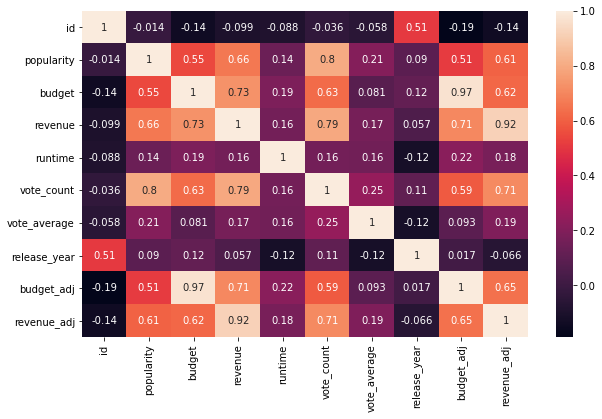

In [11]:
plt.figure(figsize=(10,6))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

### Assessing Results

- we need to remove some columns such as id and imdb_id 
- There are null values in the dataset
- There are duplicated rows
- we need to make some changes to release_date column so that we can use the date for the analysis          
- there are incorrect runtimes 
- there are movies have zero budgets and revenues in the dataset
- there are a correlation between some columns such as popularity and vote_count


## Data Cleaning 

In [12]:
df_copy=df.copy()

### Define
- we need to remove some columns such as id and imdb_id 
- we will remove homepage column as most of it's data is null and overview, keywords and tagline columns as we will not use them in the analysis 

### Code

In [13]:
df_copy.drop(['id','imdb_id','overview','homepage','tagline','keywords'],axis=1,inplace=True)
df_copy.reset_index(drop=True, inplace=True)

### Test

In [14]:
df_copy.shape

(10866, 15)

In [15]:
df_copy.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Define

- There are null values in the dataset

In [16]:
df_copy.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
df_copy.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Code

In [18]:
columns=['cast','production_companies','genres','director']
for column in columns:
    df_copy[column].replace(np.nan,'Not mentioned',inplace=True)

### Test

In [19]:
df_copy.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Define
- we need to make some changes to release_date column so that we can use the date for the analysis          


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Code

In [21]:
day=[]
month=[]

for i in range(df_copy.shape[0]):
    month.append(df_copy.release_date[i][0:2])
    month[i]=month[i].replace("/","")
    
    day.append(df_copy.release_date[i][2:4])
    day[i]=day[i].replace("/","")
    
# we will make 2 new columns one for month and one for day     
df_copy['month']=month
df_copy['day']=day


# we will rename release_year column
df_copy=df_copy.rename(columns={'release_year':'year'})

#we will drop release_date column as now we don't need it
df_copy.drop(columns='release_date',inplace = True)

In [22]:
# check for datatypes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10866 non-null  object 
 5   director              10866 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10866 non-null  object 
 8   production_companies  10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  year                  10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
 14  month                 10866 non-null  object 
 15  day                

In [23]:
#we will change the datatypes of month and day and year columns
df_copy.year=pd.to_numeric(df_copy.year)
df_copy.month=pd.to_numeric(df_copy.month)
df_copy.day=pd.to_numeric(df_copy.day)



### Test

In [24]:
# check for datatypes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10866 non-null  object 
 5   director              10866 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10866 non-null  object 
 8   production_companies  10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  year                  10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
 14  month                 10866 non-null  int64  
 15  day                

In [25]:
df_copy.year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [26]:
df_copy.month.unique()

array([ 6,  5,  3, 12,  4,  9, 10,  2,  1,  7, 11,  8], dtype=int64)

In [27]:
df_copy.day.unique()

array([ 9, 13, 18,  1,  2, 23, 30, 17,  4, 21, 16, 22, 14, 12, 19, 15, 27,
       11, 25, 24,  6,  7,  5,  3,  8, 10, 20, 26, 28, 29, 31],
      dtype=int64)

### Define
- There are duplicated rows

In [28]:
df_copy.duplicated().sum()

1

In [29]:
df_copy[df_copy.original_title =='TEKKEN']

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,year,budget_adj,revenue_adj,month,day
2089,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0,3,20
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0,3,20


### Code

In [30]:
df_copy.drop_duplicates(inplace=True)
df_copy.reset_index(drop=True, inplace=True)

### Test

In [31]:
df_copy.iloc[2090]

popularity                                                       0.591206
budget                                                           25000000
revenue                                                          15478800
original_title                                            The Conspirator
cast                    Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...
director                                                   Robert Redford
runtime                                                               122
genres                                                Crime|Drama|History
production_companies           Wildwood Enterprises|American Film Company
vote_count                                                             78
vote_average                                                          5.9
year                                                                 2010
budget_adj                                                     25000000.0
revenue_adj                           

In [32]:
df_copy.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### What is the relationships between the dataset attributes?

In [34]:
!pip install -U kaleido

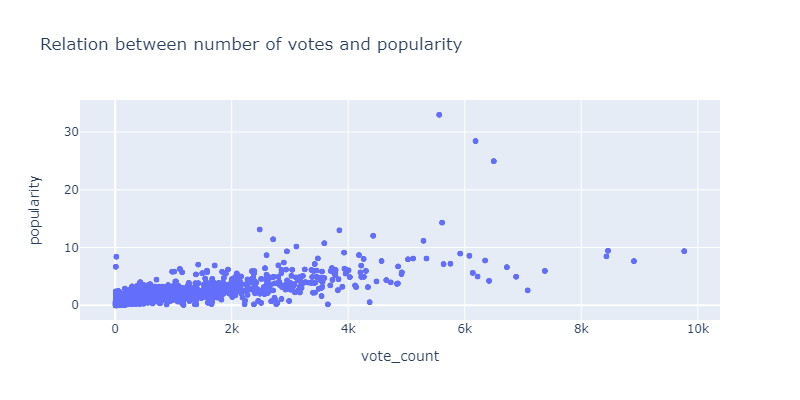

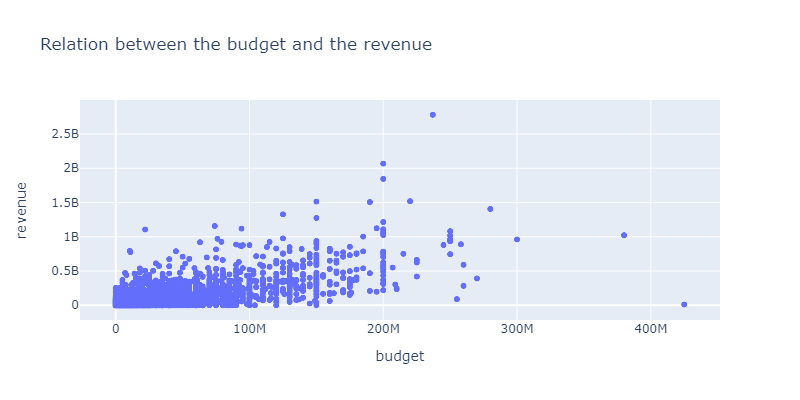

In [64]:


import plotly.io as pio

pio.renderers

fig_1 = px.scatter(df_copy,x='vote_count', y='popularity', width=800, height=400,title='Relation between number of votes and popularity')
fig_2 = px.scatter(df_copy,x='budget', y='revenue', width=800, height=400,title='Relation between the budget and the revenue')

fig_1.show('png',engine="kaleido")
fig_2.show('png',engine="kaleido")


**From those plots we can conclude that there is a strong positive correlation between the popularity of the movies and the number of votes and between the budget and the revenue which means most of the movies with high budgets gets high revenue**

### What is the most popular genre from 1960 to 2015?

In [35]:
genres_list=[]
for i in range(df_copy.shape[0]):
    genres_list.append(df_copy.genres[i].split('|'))
genres_list[1:5]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller']]

In [36]:
output = []
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            output.append(i)
removeNestings(genres_list)  

In [37]:
ser=pd.Series(output)

In [38]:
ser.value_counts().values

array([4760, 3793, 2907, 2384, 1712, 1637, 1471, 1354, 1231, 1229,  916,
        810,  699,  520,  408,  334,  270,  188,  167,  165,   23],
      dtype=int64)

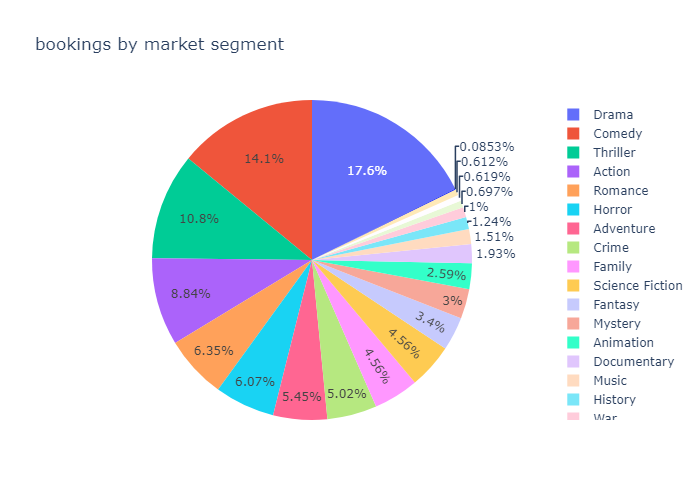

In [66]:
fig=px.pie(ser,values=ser.value_counts().values,names=ser.value_counts().index,
      title='bookings by market segment')

fig.show('png',engine="kaleido")


**we can conclude here that the most popular movie genre from 1960 to 2015 is Drama the Comedy in the second place and Thriller in the third place**

### Who are the top 10 directors ?

In [40]:
for i in range(10):
    print(df_copy.director[i])  

Colin Trevorrow
George Miller
Robert Schwentke
J.J. Abrams
James Wan
Alejandro GonzÃ¡lez IÃ±Ã¡rritu
Alan Taylor
Ridley Scott
Kyle Balda|Pierre Coffin
Pete Docter


In [41]:
#make a list of all the directors names individually 
director=[]
for i in range(df_copy.shape[0]):
    if df_copy.director[i] != 'Not mentioned':
        if '|' in df_copy.director[i]:
            director.append(df_copy.director[i].split('|'))
        else:
            director.append(df_copy.director[i])

In [42]:
## as there are some nested lists so we will use reemovNestings function
output=[]       
removeNestings(director)
output[1:10]

['George Miller',
 'Robert Schwentke',
 'J.J. Abrams',
 'James Wan',
 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu',
 'Alan Taylor',
 'Ridley Scott',
 'Kyle Balda',
 'Pierre Coffin']

In [43]:
#we will convert this list into a series
directors_series=pd.Series(output)

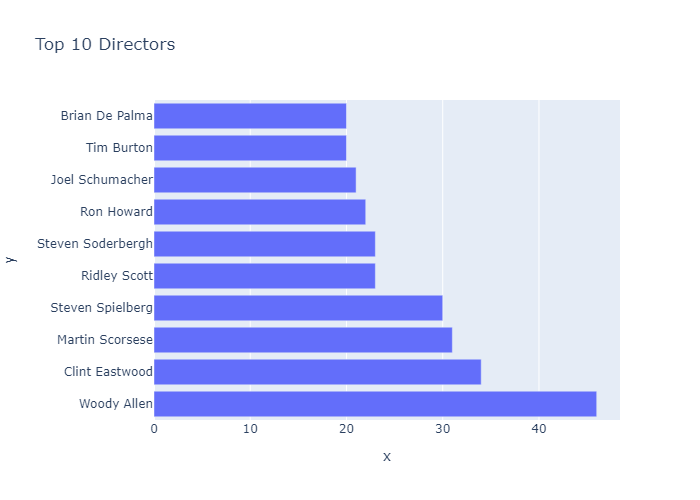

In [67]:
#we will make a bar plot
fig=px.bar(x=directors_series.value_counts()[:10], y=directors_series.value_counts()[:10].index,title='Top 10 Directors')
fig.show('png',engine="kaleido")


**we conclude here that the most famous director is Woody Allen with more than 45 movie then comed after him Clint Eastwood with 34 movie and so on..**

### Who are the top 10 actors ?

In [45]:
for i in range(10):
    print(df_copy.cast[i],'\n') 

Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson 

Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman 

Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller 

Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley 

Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson 

Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson 

Arnold Schwarzenegger|Jason Clarke|Emilia Clarke|Jai Courtney|J.K. Simmons 

Matt Damon|Jessica Chastain|Kristen Wiig|Jeff Daniels|Michael PeÃ±a 

Sandra Bullock|Jon Hamm|Michael Keaton|Allison Janney|Steve Coogan 

Amy Poehler|Phyllis Smith|Richard Kind|Bill Hader|Lewis Black 



In [46]:
#make a list of all the directors names individually 
actor=[]
for i in range(df_copy.shape[0]):
    if df_copy.cast[i] != 'Not mentioned':
        if '|' in df_copy.cast[i]:
            actor.append(df_copy.cast[i].split('|'))
        else:
            actor.append(df_copy.cast[i])

## as there are some nested lists so we will use reemovNestings function
output=[]       
removeNestings(actor)
output[1:10]        

['Bryce Dallas Howard',
 'Irrfan Khan',
 "Vincent D'Onofrio",
 'Nick Robinson',
 'Tom Hardy',
 'Charlize Theron',
 'Hugh Keays-Byrne',
 'Nicholas Hoult',
 'Josh Helman']

In [47]:
#we will convert this list into a series
actors_series=pd.Series(output)

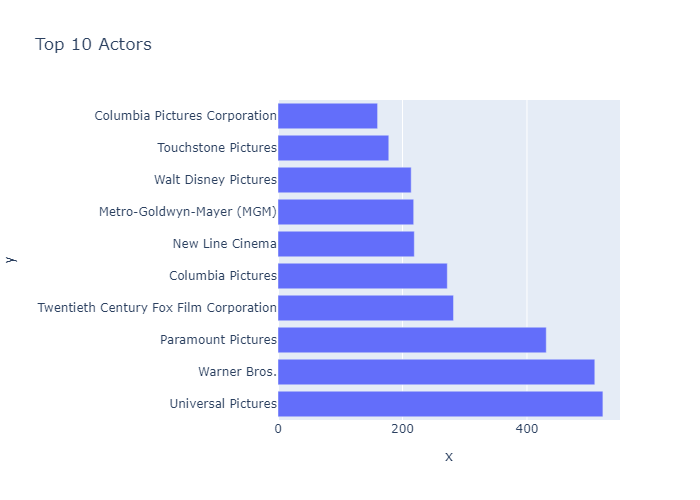

In [68]:
#we will make a bar plot
fig=px.bar(x=actors_series.value_counts()[:10], y=actors_series.value_counts()[:10].index,title='Top 10 Actors')
fig.show('png',engine="kaleido")


**Here we can see that the most famous actor is Robert De Niro as he made about 72 movie then in the second place Samuel L.Jackson with about 71 movie**

### What is the average revenue in each year?

In [49]:
avg_revenue=df_copy.groupby('year')['revenue'].mean().reset_index()
avg_revenue.head()

,year,revenue
0,1960,4.531406e+06
1,1961,1.089420e+07
2,1962,6.736870e+06
3,1963,5.511911e+06
4,1964,8.118614e+06


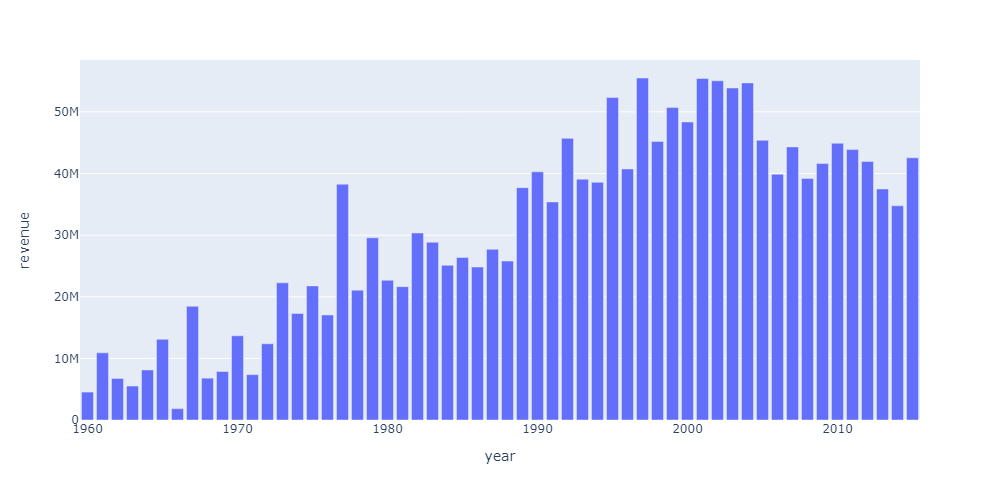

In [69]:
#we will make a bar plot
fig=px.bar(avg_revenue,x='year', y='revenue',width=1000, height=500)
fig.show('png',engine="kaleido")


**It's obvious here that the biggest average was in 1997 then in 2001**

### What is the average movies budget in each year?

In [51]:
avg_budget=df_copy.groupby('year')['budget'].mean().reset_index()
avg_budget.head()

,year,budget
0,1960,6.892796e+05
1,1961,1.488290e+06
2,1962,1.710066e+06
3,1963,2.156809e+06
4,1964,9.400753e+05


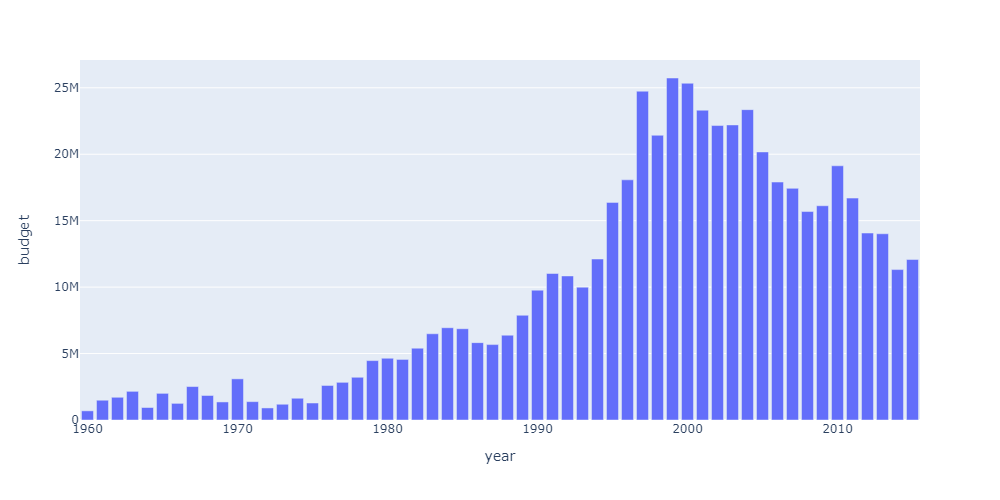

In [70]:
#we will make a bar plot
fig=px.bar(avg_budget,x='year', y='budget',width=1000, height=500)
fig.show('png',engine="kaleido")


**It's obvious here that the biggest average budget was in 1999 then in 2000**

### What is the most famous production company?

In [53]:
for i in range(10):
    print(df_copy.production_companies[i],'\n') 

Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 

Village Roadshow Pictures|Kennedy Miller Productions 

Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 

Lucasfilm|Truenorth Productions|Bad Robot 

Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 

Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 

Paramount Pictures|Skydance Productions 

Twentieth Century Fox Film Corporation|Scott Free Productions|Mid Atlantic Films|International Traders|TSG Entertainment 

Universal Pictures|Illumination Entertainment 

Walt Disney Pictures|Pixar Animation Studios|Walt Disney Studios Motion Pictures 



In [54]:
#make a list of all the directors names individually 
prod_companies=[]
for i in range(df_copy.shape[0]):
    if df_copy.production_companies[i] != 'Not mentioned':
        if '|' in df_copy.production_companies[i]:
            prod_companies.append(df_copy.production_companies[i].split('|'))
        else:
            prod_companies.append(df_copy.production_companies[i])

## as there are some nested lists so we will use reemovNestings function
output=[]       
removeNestings(prod_companies)
output[1:10]        

['Amblin Entertainment',
 'Legendary Pictures',
 'Fuji Television Network',
 'Dentsu',
 'Village Roadshow Pictures',
 'Kennedy Miller Productions',
 'Summit Entertainment',
 'Mandeville Films',
 'Red Wagon Entertainment']

In [55]:
#we will convert this list into a series
actors_series=pd.Series(output)

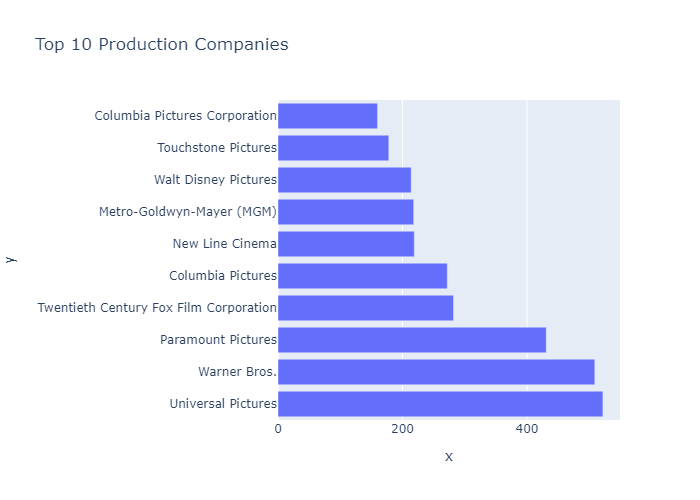

In [73]:
#we will make a bar plot
fig=px.bar(x=actors_series.value_counts()[:10], y=actors_series.value_counts()[:10].index,title='Top 10 Production Companies')
fig.show('png',engine="kaleido")


**Universal Pictures is the most famous production company then Warner Bros. in the second place**

<a id='conclusions'></a>
## Conclusions

- there is a strong positive correlation between the popularity of the movies and the number of votes and between the budget and the revenue which means most of the movies with high budgets gets high revenue

- the most popular movie genre from 1960 to 2015 is Drama the Comedy in the second place and Thriller in the third place

-  the most famous director is Woody Allen with more than 45 movie then comed after him Clint Eastwood with 34 movie and so on..

-  the most famous actor is Robert De Niro as he made about 72 movie then in the second place Samuel L.Jackson with about 71 movie

- the biggest revenue average was in 1997 then in 2001

- the biggest average budget was in 1999 then in 2000

- Universal Pictures is the most famous production company then Warner Bros. in the second place